## AVIATION DATA ANALYSIS PROJECT
### INTRODUCTION
### Our goal is to find out which aircrafts to recommend for purchase for either commercial or private enterprises. Through detailed analysis of data on aviation flight histories, it is possible to determine which aircrafts are the safest options to recommend for acquisition for the new Aviation Division.

#### First, import the necessary libraries that will be used to clean,analyze and visualize the data in order to gain the relevant insights.

In [151]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### This project will make use of data from AviationData.csv and NTSB_database.csv.

In [152]:
#loading the datasets
#we set the encoding to Latin 1 since it isnt the default UTF-8
aviation_data_df = pd.read_csv("AviationData.csv", encoding = "Latin 1", low_memory=False)


#### The data frame structures are then inspected to understand its features.

In [153]:
#inspecting the dataframe structure
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Are there null values?

In [154]:
#we realise there are a number of inconsistent column values which we need to correct because many have missing values,some are nul
aviation_data_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

#### The dataframe has 31 columns with inconsistent rows.
#### However there is adequate data in the columns that are useful to us hence those can be retrieved while dropping others.

#### Also there is a need to check for duplicated rows to avoid redundancy

In [155]:
#checking for duplicated rows
aviation_data_df["Event.Id"].duplicated().sum()

938

#### These duplicates are then dropped using the Event.Id as a subset, since it will serve to merge to the data in the NTSB_database.csv 

In [156]:
#dropping duplicates using the Event.Id column as a subset
aviation_data_df.drop_duplicates(subset="Event.Id",inplace=True, keep="first")

In [157]:
#confirm that the duplicates have been dropped
aviation_data_df["Event.Id"].duplicated().sum()

0

#### The columns are then individually inspected in order to account for missing or null values by either keeping,discarding or replacing the values. The datatypes are also enforced to the most appropriate type beginning with the Event.Date column.

In [158]:
#changing the Event.Date type from object to datetime
aviation_data_df["Event.Date"]=pd.to_datetime(aviation_data_df["Event.Date"])

#### Moving on to the Location column.

In [159]:
#view the first 10 rows
aviation_data_df["Location"].head(10)

0     MOOSE CREEK, ID
1      BRIDGEPORT, CA
2       Saltville, VA
3          EUREKA, CA
4          Canton, OH
5          BOSTON, MA
6          COTTON, MN
7         PULLMAN, WA
8    EAST HANOVER, NJ
9    JACKSONVILLE, FL
Name: Location, dtype: object

 #### It contains both the city and state name. This can be split into two seperate columns named City and State respectively.

In [160]:
#we will use split the string into two using the , as a delimiter
aviation_data_df[["City","State"]]=aviation_data_df["Location"].str.split(",",1,expand=True)

#### The columns containing significant missing rows can be dropped because replacing them might cause unnecessary bias.

In [161]:
#we can then drop the Location column (as it has been replaced by city and state column) along with other columns which are not relevant for our research or might be missing too many rows.
aviation_data_df.drop(columns=["Report.Status","Broad.phase.of.flight","Weather.Condition","Longitude","Latitude","Airport.Code","Airport.Name","Accident.Number","Location","Air.carrier","Registration.Number","FAR.Description","Schedule","Publication.Date"], axis = 1,inplace=True)

#### The new dataframe contains two new columns and is without a number of dropped other columns.

In [162]:
#inspecting for changes made
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Event.Date              87951 non-null  datetime64[ns]
 3   Country                 87729 non-null  object        
 4   Injury.Severity         86961 non-null  object        
 5   Aircraft.damage         84848 non-null  object        
 6   Aircraft.Category       32181 non-null  object        
 7   Make                    87888 non-null  object        
 8   Model                   87859 non-null  object        
 9   Amateur.Built           87851 non-null  object        
 10  Number.of.Engines       81924 non-null  float64       
 11  Engine.Type             80927 non-null  object        
 12  Purpose.of.flight       81829 non-null  object

#### The next step is to deal with null, erroneous and missing values

In [163]:
#checking for null, missing or eroneous values
aviation_data_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Country                     222
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
City                         52
State                       548
dtype: int64

#### Moving on to Country column with 222 missing values. The missing rows are insignificant hence they are dropped without introducing bias.

In [164]:
#dropping rows with missing values for Country column
aviation_data_df.dropna(subset=["Country"], inplace=True)

#### For longitude and latitude, the missing rows are significant. However, the country column can also be used to reference accident sites hence the longitude and latitude columns can be dropped.

In [165]:
#viewing the first 10 rows
aviation_data_df.head(10)

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,City,State
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Saltville,VA
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,Canton,OH
5,20170710X52551,Accident,1979-09-17,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,BOSTON,MA
6,20001218X45446,Accident,1981-08-01,United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,COTTON,MN
7,20020909X01562,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,PULLMAN,WA
8,20020909X01561,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,EAST HANOVER,NJ
9,20020909X01560,Accident,1982-01-01,United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,JACKSONVILLE,FL


#### For the Injury.Severity column, the missing values are replaced with unknown without losing information

In [166]:
#filling the missing rows with string unknown
aviation_data_df["Injury.Severity"].fillna("unknown", inplace=True)

#### For Aircraft.damage column, missing values could mean there wasnt any damage. instead of dropping them, the category unknown is used to fill the null values

In [167]:
#checking for value counts of unique values
aviation_data_df["Aircraft.damage"].value_counts()

Substantial    63526
Destroyed      18322
Minor           2673
Unknown          119
Name: Aircraft.damage, dtype: int64

In [168]:
#we use the category called unknown and use it to fill the null values
aviation_data_df["Aircraft.damage"].astype("category")
aviation_data_df["Aircraft.damage"].fillna("Unknown", inplace = True)

#### The process is repeated for Aircraft category as deleting the rows will result in significant loss of data

In [169]:
#checking for null values
aviation_data_df["Aircraft.Category"].isna().sum()

55560

In [170]:
#checking for unique values/categories
aviation_data_df["Aircraft.Category"].value_counts()
aviation_data_df["Aircraft.Category"].astype("category")

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
88884         NaN
88885         NaN
88886    Airplane
88887         NaN
88888         NaN
Name: Aircraft.Category, Length: 87729, dtype: category
Categories (15, object): ['Airplane', 'Balloon', 'Blimp', 'Glider', ..., 'Ultralight', 'Unknown', 'WSFT', 'Weight-Shift']

#### An unknown category already exists hence the null values are added to this category

In [171]:
#adding the null values to unknown category
aviation_data_df["Aircraft.Category"].fillna("Unknown", inplace = True)

#### For the make and model, dropping the rows will have a negligible impact on the analysis without introducing unnecessary bias

In [172]:
#dropping the missing rows using make and model column as subsets
aviation_data_df.dropna(subset=["Make"], inplace=True)
aviation_data_df.dropna(subset=["Model"], inplace=True)


#### For the column called Amateur.Built, what are the unique values?

In [173]:
#checking the columns unique values
aviation_data_df["Amateur.Built"].unique()

array(['No', 'Yes', nan], dtype=object)

#### An unknown category is added for the missing rows 

In [174]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Amateur.Built"] = aviation_data_df["Amateur.Built"].astype("category")
aviation_data_df["Amateur.Built"] = aviation_data_df["Amateur.Built"].cat.add_categories("unknown")
aviation_data_df["Amateur.Built"].fillna("unknown", inplace = True)

#### For the Number of Engines column, the missing values can be filled using the mode

In [175]:
#use the mode to fill the missing values
aviation_data_df["Number.of.Engines"] = aviation_data_df["Number.of.Engines"].fillna(aviation_data_df["Number.of.Engines"].mode()[0])

In [176]:
#to view the first 15 rows
aviation_data_df.head(15)

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,City,State
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Saltville,VA
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,1.0,NaN,Personal,1.0,2.0,NaN,0.0,Canton,OH
5,20170710X52551,Accident,1979-09-17,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,BOSTON,MA
6,20001218X45446,Accident,1981-08-01,United States,Fatal(4),Destroyed,Unknown,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,COTTON,MN
7,20020909X01562,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,PULLMAN,WA
8,20020909X01561,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,EAST HANOVER,NJ
9,20020909X01560,Accident,1982-01-01,United States,Non-Fatal,Substantial,Unknown,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,JACKSONVILLE,FL


#### For the column engine.type, replace the missing values with unknown

In [177]:
#inspecting for the different categories
aviation_data_df["Engine.Type"].unique()
aviation_data_df["Engine.Type"].astype("category")

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4                  NaN
             ...      
88884              NaN
88885              NaN
88886              NaN
88887              NaN
88888              NaN
Name: Engine.Type, Length: 87618, dtype: category
Categories (13, object): ['Electric', 'Geared Turbofan', 'Hybrid Rocket', 'LR', ..., 'Turbo Prop', 'Turbo Shaft', 'UNK', 'Unknown']

In [178]:
#use unknown category to fill the null values
aviation_data_df["Engine.Type"].fillna("Unknown", inplace = True)


#### Next is the purpose of flight column. This column is very significant as it narrows down the data to flights which may be relevant to our new business venture.

In [179]:
#inspecting the column categories
aviation_data_df["Purpose.of.flight"].astype("category")
aviation_data_df["Purpose.of.flight"].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [180]:
#the category called unknown is used to fill the null values
aviation_data_df["Purpose.of.flight"].fillna("Unknown", inplace = True)

In [181]:
#checking for the total number of null values
#it should reflect 0 since we have already dealt with the null values
aviation_data_df["Purpose.of.flight"].isna().sum()

0

#### According to the data, the Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries, Total.Uninjured columns have NaN inplace of 0. This implies that depending on if there were survivors or not, once columns were filled accounting for the people involved, the remaining columns were left null. Therefore , null values are replacable by 0 in the columns mentioned above.

In [182]:
#fill the NaN values with 0 
aviation_data_df["Total.Fatal.Injuries"].isna().sum()
aviation_data_df['Total.Fatal.Injuries'].fillna(0, inplace=True)
aviation_data_df['Total.Minor.Injuries'].fillna(0, inplace=True)
aviation_data_df['Total.Serious.Injuries'].fillna(0,inplace=True)
aviation_data_df['Total.Uninjured'].fillna(0,inplace=True)
aviation_data_df[["Total.Fatal.Injuries","Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured"]].astype="int"
aviation_data_df["Aircraft.Category"].astype("category")

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
88884     Unknown
88885     Unknown
88886    Airplane
88887     Unknown
88888     Unknown
Name: Aircraft.Category, Length: 87618, dtype: category
Categories (15, object): ['Airplane', 'Balloon', 'Blimp', 'Glider', ..., 'Ultralight', 'Unknown', 'WSFT', 'Weight-Shift']

#### For city and State, the number of null values is negligible so we can use both columns as a subset and drop the rows

In [183]:
#dropping the rows containing null values
aviation_data_df.dropna(subset=["City","State"],inplace=True)

### The NTSB_database.csv is then also loaded and inspected.

In [184]:
#loading the dataset into a dataframe object
ntsb_database_df=pd.read_csv("NTSB_database.csv")
ntsb_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event Id                      87951 non-null  object 
 1   Investigation Type            87951 non-null  object 
 2   Country                       87951 non-null  object 
 3   Aircraft Damage               87951 non-null  object 
 4   Aircraft Category             87951 non-null  object 
 5   Make                          87951 non-null  object 
 6   Model                         87951 non-null  object 
 7   Amateur Built                 87951 non-null  object 
 8   Number Of Engines             87951 non-null  int64  
 9   Engine Type                   87951 non-null  object 
 10  Far Description               87951 non-null  object 
 11  Schedule                      87951 non-null  object 
 12  Purpose Of Flight             87951 non-null  object 
 13  T

In [185]:
#checking available columns
ntsb_database_df.columns

Index(['Event Id', 'Investigation Type', 'Country', 'Aircraft Damage',
       'Aircraft Category', 'Make', 'Model', 'Amateur Built',
       'Number Of Engines', 'Engine Type', 'Far Description', 'Schedule',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Analysis', 'City', 'Longitude', 'Latitude',
       'Address', 'geometry', 'Place', 'Number Of Seats', 'Type Aircraft',
       'Type Engine', 'Total Person', 'Far Description Factorized',
       'Schedule Factorized', 'Purpose Of Flight Factorized',
       'Make Factorized', 'Model Factorized', 'Event Year', 'Publication Year',
       'Event Month', 'Publication Month', 'Event Day', 'Publication Day',
       'Date Difference', 'Publication Month Name', 'Event Month Name',
       'Season'],
      dtype='object')

#### This data frame is then merged to the initial aviation_data_df using the Event.Id column as the subset to create a single dataframe which is then called merged_df.

In [186]:
#merging the two dataframes into a single dataframe using inner option
merged_df=aviation_data_df.merge(ntsb_database_df[['Event Id',"Total Person","Address","Broad Phase Of Flight","Season","Longitude","Latitude","Place"]],left_on='Event.Id',right_on='Event Id',how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87292 entries, 0 to 87291
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87292 non-null  object        
 1   Investigation.Type      87292 non-null  object        
 2   Event.Date              87292 non-null  datetime64[ns]
 3   Country                 87292 non-null  object        
 4   Injury.Severity         87292 non-null  object        
 5   Aircraft.damage         87292 non-null  object        
 6   Aircraft.Category       87292 non-null  object        
 7   Make                    87292 non-null  object        
 8   Model                   87292 non-null  object        
 9   Amateur.Built           87292 non-null  category      
 10  Number.of.Engines       87292 non-null  float64       
 11  Engine.Type             87292 non-null  object        
 12  Purpose.of.flight       87292 non-null  object

#### There are two columns,Event.Id and Event Id, hence one is dropped.

In [187]:
#using drop function we drop the extra Event.id column
merged_df.drop(["Event Id"], axis = 1,inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87292 entries, 0 to 87291
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87292 non-null  object        
 1   Investigation.Type      87292 non-null  object        
 2   Event.Date              87292 non-null  datetime64[ns]
 3   Country                 87292 non-null  object        
 4   Injury.Severity         87292 non-null  object        
 5   Aircraft.damage         87292 non-null  object        
 6   Aircraft.Category       87292 non-null  object        
 7   Make                    87292 non-null  object        
 8   Model                   87292 non-null  object        
 9   Amateur.Built           87292 non-null  category      
 10  Number.of.Engines       87292 non-null  float64       
 11  Engine.Type             87292 non-null  object        
 12  Purpose.of.flight       87292 non-null  object

#### displaying the summary statistics for the new data frame

In [188]:
#summary statistics for numerical columns
merged_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Person,Longitude,Latitude
count,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000
mean,1.132693,0.547301,0.240583,0.301528,4.633346,5.722758,-84.599353,37.544204
std,0.425930,4.906293,1.442345,1.973245,25.209761,26.025922,46.788933,13.963384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-177.375430,-77.848335
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-110.974847,33.415048
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-90.754956,38.756867
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,-79.674203,43.207178
max,8.000000,349.000000,161.000000,380.000000,699.000000,699.000000,179.559745,90.000000


#### A new column Total Injuries which takes the sum of the columns,Total Serious Injuries and Total Minor Injuries to represent the total number of injured people is created

In [189]:
#creating a new column 
merged_df["Total.Injuries"]=merged_df["Total.Serious.Injuries"]+merged_df["Total.Minor.Injuries"]

#### For simplicity and tidiness, the white spaces can be stripped, the splitter/delimiter removed and then the column names lowered

In [190]:
merged_df.columns = [col.strip().lower().replace("."," ") for col in merged_df.columns]
merged_df.columns

Index(['event id', 'investigation type', 'event date', 'country',
       'injury severity', 'aircraft damage', 'aircraft category', 'make',
       'model', 'amateur built', 'number of engines', 'engine type',
       'purpose of flight', 'total fatal injuries', 'total serious injuries',
       'total minor injuries', 'total uninjured', 'city', 'state',
       'total person', 'address', 'broad phase of flight', 'season',
       'longitude', 'latitude', 'place', 'total injuries'],
      dtype='object')

In [191]:
#additional cleaning and correcting data types
merged_df["year"]=merged_df["event date"].dt.year
merged_df["month"]=merged_df["event date"].dt.month
merged_df["date"]=merged_df["event date"].dt.day
merged_df[["number of engines","total injuries","total fatal injuries","total uninjured","total minor injuries","total serious injuries"]]=merged_df[["number of engines","total injuries","total fatal injuries","total uninjured","total minor injuries","total serious injuries"]].astype("int")

#### Finally, the file is saved as a new cleaned csv file

In [192]:
#creating a new clean file
merged_df.to_csv("CleanedAviationData.csv", index=False)

## Data Analysis

### We now have a clean dataset which we use to analyse in order to come with recommendations for the type of aircraft to acquire based on the purpose among other considerations
### We can view the number of total fatal injuries associated with different engine types and from that we can select those with the least total fatal injuries.

### First, we will filter the dataframe object in order to view only rows for the business category in our purpose of flight column because that would relate to the aircraft we would like to operate for commercial entreprise.
### We can also filter according to personal category for private use

In [193]:
#inspecting the unique values for our specific category which is business
merged_df["purpose of flight"].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [194]:
#filtering the dataframe and renaming the new dataframes according to the purpose
business_df=merged_df[merged_df["purpose of flight"]=="Business"]
personal_df=merged_df[merged_df["purpose of flight"]=="Personal"]

#### We can then visualize the total number of injuries associated with different engine types

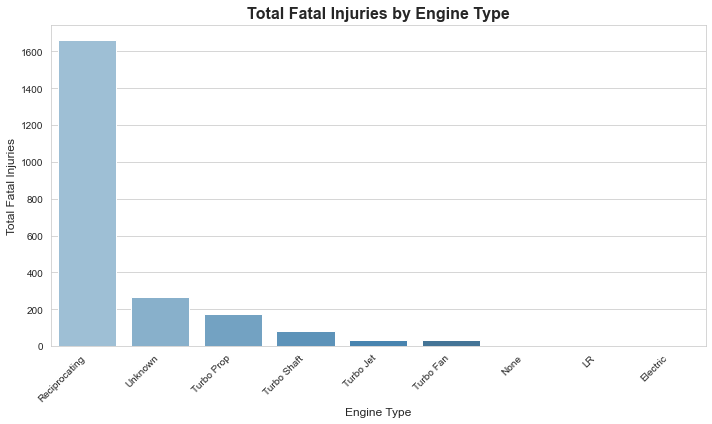

In [195]:

# Set plot style
fatal_injuries_by_engine = business_df.groupby("engine type")["total fatal injuries"].sum().sort_values(ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
sns.barplot(x=fatal_injuries_by_engine.index, y=fatal_injuries_by_engine.values, palette="Blues_d")

# Add titles and labels
plt.title("Total Fatal Injuries by Engine Type", fontsize=16, fontweight='bold')
plt.xlabel("Engine Type", fontsize=12)
plt.ylabel("Total Fatal Injuries", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()
plt.show()







### We can conclude that in our purchase, we would need to avoid aircraft which use reciprocating engine types as these are associated with a higher total fatal injuries count. We can recommenfd those that use electric, LR or even Turbo fan.

#### What are the total fatal injuries caused by the different aircraft categories?

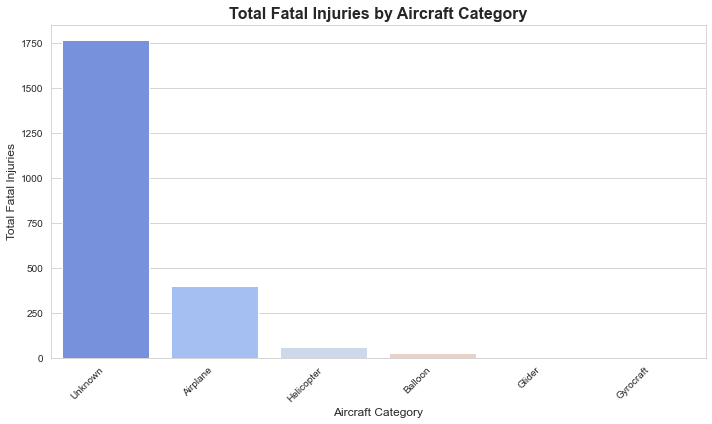

In [196]:
fatal_injuries_by_category = business_df.groupby("aircraft category")["total fatal injuries"].sum().sort_values(ascending=False)

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
sns.barplot(x=fatal_injuries_by_category.index, y=fatal_injuries_by_category.values, palette="coolwarm")

# Add titles and labels
plt.title("Total Fatal Injuries by Aircraft Category", fontsize=16, fontweight='bold')
plt.xlabel("Aircraft Category", fontsize=12)
plt.ylabel("Total Fatal Injuries", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()
plt.show()



### We can conclude that for business purposes, helicopters are the best option as it can be seen that they have the least number of fatal injuries

<Figure size 864x504 with 0 Axes>

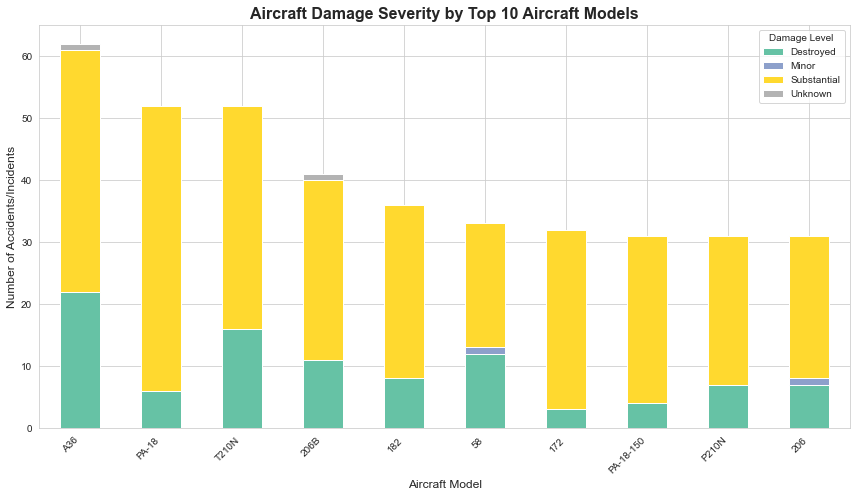

In [197]:
top_models = business_df["model"].value_counts().head(10).index
damage_by_model = (business_df.groupby(["model", "aircraft damage"]).size().unstack(fill_value=0).loc[top_models])

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create stacked bar plot
damage_by_model.plot(kind="bar", stacked=True, colormap="Set2", figsize=(12, 7))

# Add titles and labels
plt.title("Aircraft Damage Severity by Top 10 Aircraft Models", fontsize=16, fontweight='bold')
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Number of Accidents/Incidents", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legend outside the plot
plt.legend(title="Damage Level", loc='upper right')

# Tight layout for better spacing
plt.tight_layout()
plt.show();



### The least robust model is the A36 model


### what about the airplane with the highest uninjured people?

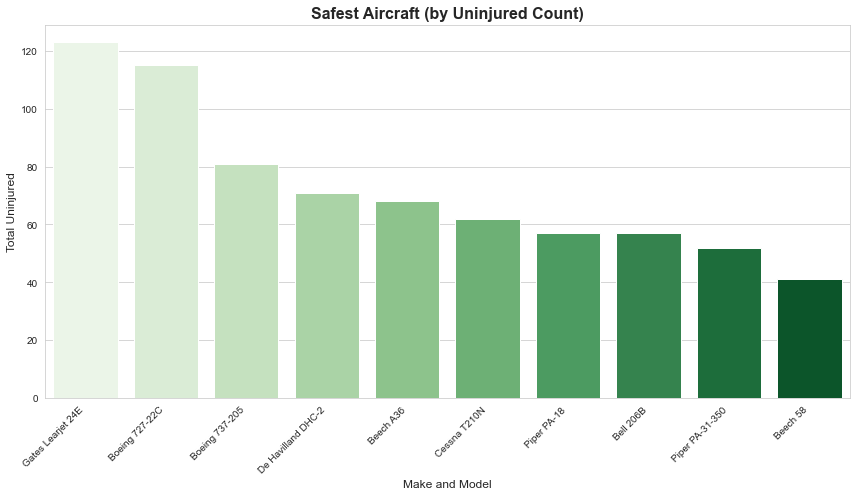

In [198]:

uninjured_by_make_model = (
    business_df.groupby(["make", "model"])["total uninjured"].sum().sort_values(ascending=False).head(10)
)

# Format index for readability
labels = [f"{make} {model}" for make, model in uninjured_by_make_model.index]

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create barplot
sns.barplot(x=labels, y=uninjured_by_make_model.values, palette="Greens")

# Add titles and labels
plt.title("Safest Aircraft (by Uninjured Count)", fontsize=16, fontweight='bold')
plt.xlabel("Make and Model", fontsize=12)
plt.ylabel("Total Uninjured", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()
plt.show()



### We can see from the above visualization that the Gates Learjet,24E has the highest number of uninjured people, hence we reccommend that we acquire that aircraft. 

## Conclusion


### From the results, aircraft with electric engine types are recommended while those with reciprocating engine types should be avoided since they are involved in the highest fatalities and accident occurrences.
### The company should consider acquiring the Gates Learjet,24E which is the safest option for business purposes since it has the highest rates of uninjured users.
### The company should also consider opting for helicopters as well because they are among the aircraft categories associated with the least fatal injuries during business flights.
### The company should also steer clear of the Cessna make and A36 model because the data associates them with high aircraft damage and potentially the highest fatalities and accident rates.


*For future projects, the make and models could be grouped together to further narrow down on specific aircraft characteristics.*
